In [184]:
import xml.etree.ElementTree as ET
from collections import defaultdict
import re
import pprint

Went through the OSM file and printed out all the different postcodes in the file so see how many errors we have and what type they can be. At first there we a lot of errors, I programmed all the ones that can be changed programmically and the remaining I searched the file using Find.

In [185]:
zip_codes = defaultdict(int)
zip_code_re = re.compile(r'^[5][3]\d{3}$')

def print_sorted_dict(d):
    keys = d.keys()
    keys = sorted(keys, key=lambda s: s.lower())
    for k in keys:
        v = d[k]
        print("%s: %d" % (k, v)) 

def is_zip_code(elem):
    return (elem.tag == "tag") and (elem.attrib['k'] == "addr:postcode")

def count_zip_code(zip_codes, zip_code):
    m = zip_code_re.search(zip_code)
    if not m:
        zip_codes[zip_code] += 1

def audit_zip():
    osm_file = open("Milwaukee.osm", "r", encoding="utf8")
    for event, elem in ET.iterparse(osm_file):
        if is_zip_code(elem):
            count_zip_code(zip_codes, elem.attrib['v'])  
            
    osm_file.close()
    return zip_codes
audit_zip()

defaultdict(int,
            {'Milwaukee WI, 53222': 1,
             '53202-1615': 1,
             '53202-2330': 1,
             '53217-5399': 1,
             '53005-5918': 1,
             '53220-4320': 1,
             '53212-3942': 1,
             '53212-3951': 2,
             'WI - 53051': 4,
             'WI - 53222': 1,
             'WI - 53226': 7,
             '53217-1628': 1,
             '53217-2030': 1,
             '53205-0740': 1,
             '53202-1552': 1,
             '53202-1697': 1,
             '54220': 3,
             '53202-1614': 1,
             '53212-4099': 1,
             '53202-2001': 1,
             '53212-3839': 2,
             '53205-2236': 1,
             '53202-1510': 1,
             '53202-2018': 1,
             '531351': 1,
             '53202-1618': 1,
             '53217-2339': 1,
             '53217-2338': 1,
             '53214-3110': 1,
             '53203-3099': 1})

In [186]:
def change_zip(zip_code):
    find_zip_re = re.compile(r'(53\d{3})')
    m = find_zip_re.search(zip_code)
    if m:
        new_zip = m.group()
        return new_zip
    else:
        return zip_code
    
def update_zip_codes(fix):
    for zip_code in fix.keys():
        print (zip_code, "=>", change_zip(zip_code))

In [187]:
update_zip_codes(audit_zip())

Milwaukee WI, 53222 => 53222
53202-1615 => 53202
53202-2330 => 53202
53217-5399 => 53217
53005-5918 => 53005
53220-4320 => 53220
53212-3942 => 53212
53212-3951 => 53212
WI - 53051 => 53051
WI - 53222 => 53222
WI - 53226 => 53226
53217-1628 => 53217
53217-2030 => 53217
53205-0740 => 53205
53202-1552 => 53202
53202-1697 => 53202
54220 => 54220
53202-1614 => 53202
53212-4099 => 53212
53202-2001 => 53202
53212-3839 => 53212
53205-2236 => 53205
53202-1510 => 53202
53202-2018 => 53202
531351 => 53135
53202-1618 => 53202
53217-2339 => 53217
53217-2338 => 53217
53214-3110 => 53214
53203-3099 => 53203


For the cells that I needed to change manually I opened the file and used CTRL F and typed in the lines i was looking for and manually changed them to the correct zip code.

Below is how I found the zip codes that I would need to change manually, it helped knowing what the errors were so I can search the file and find the errors quickly.

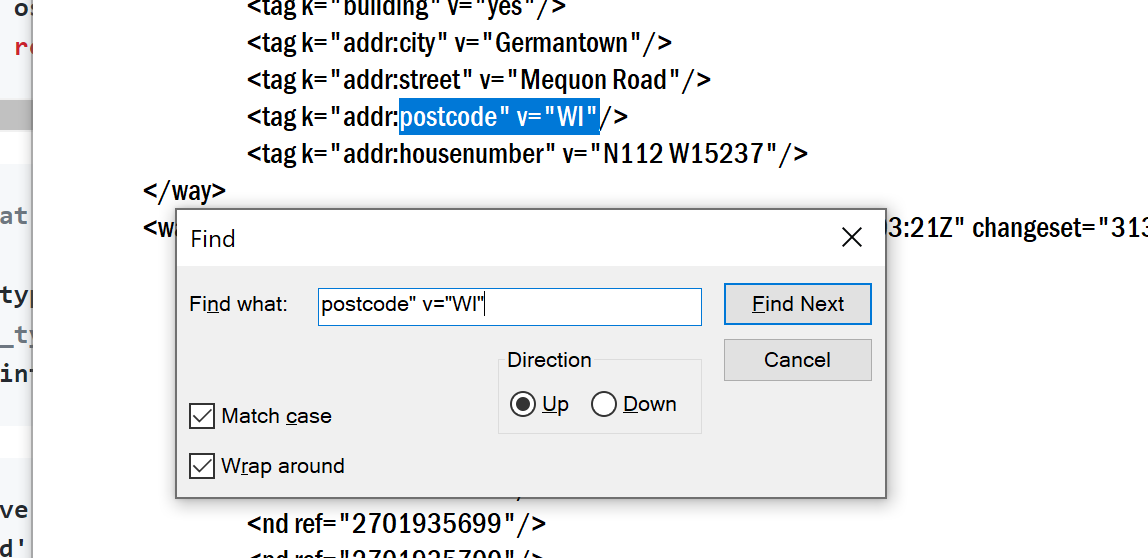